# Lection  - Regression

## Project Plan:
- prepare data and do EDA (Exploratory Data Analysis)
- Use Linear Regression for price prediction
- Understand the internals of Linear Regression
- Evaluate the model with RMSE (root mean squared error)
- Feature Engineering
- Regularization
- Using the model

# Data preparation

In [2]:
import pandas as pd

import numpy as np

In [3]:
data = 'https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/chapter-02-car-price/data.csv'

In [4]:
! wget data

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# downloading data:
!python -m wget $data


Saved under data (3).csv


In [6]:
df = pd.read_csv('./data/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


we have some inconsistency in the data: space in some column names and _ in others

In [7]:
# change column names:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


now we have to do similar to values:  
but before we need to know what columns are strings:

In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

objects are actually sting in that case:

In [9]:
# change sting columns to a better representation:

# get sting columns names:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# change values in that columns
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

# EDA (Exploratory data analysis)

we want to understand what data looks like

we already know that some that columns are stings and some are numbers  
now let's try to see what is there inside:

In [11]:
for col in df.columns:
    print(f'consider column: "{col}"')
    print('first 5 unique values are:', df[col].unique()[:5])
    print(f'number of unique values in column: {df[col].nunique()}')
    print()

consider column: "make"
first 5 unique values are: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
number of unique values in column: 48

consider column: "model"
first 5 unique values are: ['1_series_m' '1_series' '100' '124_spider' '190-class']
number of unique values in column: 914

consider column: "year"
first 5 unique values are: [2011 2012 2013 1992 1993]
number of unique values in column: 28

consider column: "engine_fuel_type"
first 5 unique values are: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
number of unique values in column: 10

consider column: "engine_hp"
first 5 unique values are: [335. 300. 230. 320. 172.]
number of unique values in column: 356

consider column: "engine_cylinders"
first 5 unique values are: [ 6.  4.  5.  8. 12.]
number of unique values in column: 9

consider column: "transmission_type"
first 5 unique values are: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unkno

now let's take a look at the distribution of Price column:

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

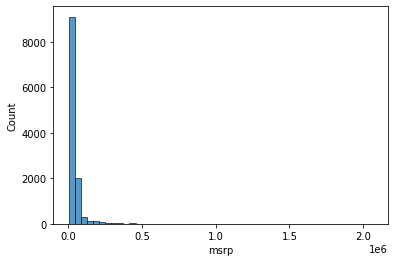

In [13]:
sns.histplot(data=df, x='msrp', bins=50)

**Long tile distribution** this kind of distribution is very often can be met, where we have some outliers with very high values

<AxesSubplot:xlabel='msrp', ylabel='Count'>

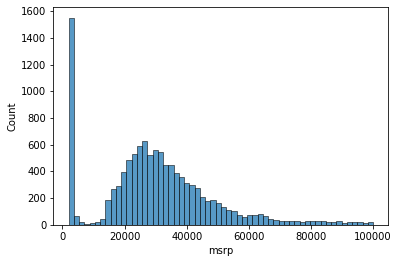

In [14]:
# to zoom in a bit, we can filter high outliers:
sns.histplot(data = df[df['msrp'] < 100000], x='msrp') 

we can see that there are many cars that cost 1000, it may be due to the Minimum price on the platform

for prices this kind of distribution is common

this kind of distribution is not really good for ML, since long tale might influence algorithm  

therefore we can use Log dist:

In [15]:
np.log([0,1,10,100,100000])

C:\Users\z004ejty\AppData\Local\Temp\ipykernel_34628\1950038018.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0,1,10,100,100000])


array([       -inf,  0.        ,  2.30258509,  4.60517019, 11.51292546])

however, there is a problem with zero for Log function, since Log(0) does not exists  
although, it is not the problem in our case, since we have no 0 values of Price, however, to eliminate we can add 1 to all values to make sure that:

In [16]:
np.log1p([0, 1, 10, 100, 100000]) # the same as np.log([0+1, ...])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052, 11.51293546])

In [17]:
price_logs = np.log1p(df['msrp'])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

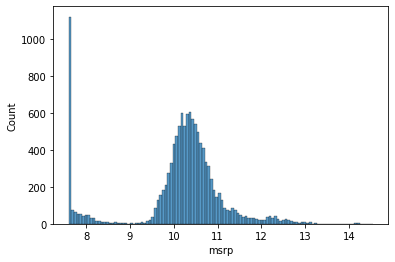

In [18]:
sns.histplot(price_logs)

now there is not Tail, so there are not so much outliers,  
now the shape resenbles Bell Curve shape (Normal Distribution)  
Normal Distribution is ideal for ML

### Deal with missing values

In [19]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework

In [20]:
print(f'size of dataset = {len(df)} rows')

share_20_perc = int(len(df) * 0.2)
print(f'20% of this is {share_20_perc}')

share_60_perc = int(len(df) * 0.6)
print(f'60% of whole dataset is {share_60_perc}')

check_sum = share_20_perc * 2 + share_60_perc
print(f'check sum = {check_sum}')

n_val = share_20_perc
n_test = share_20_perc
n_train = 0

size of dataset = 11914 rows
20% of this is 2382
60% of whole dataset is 7148
check sum = 11912


since we do not have the same number of records, therefore we will simply use 60% by subtracting the number of test and validation records

In [21]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f'n = {n}, n_sum = {n_val + n_test + n_train}')
print(n_train, n_val, n_test)

n = 11914, n_sum = 11914
7150 2382 2382


In [22]:
# get parts of df:
df_train = df.iloc[: n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val :]

however, we can see that 1st records are about 1 manufacturer only, therefore we need to shuffle

therefore, we can take numbers from 0 to n and then shuffle them to get random rows in datasets:

In [23]:
# creating sequence of indexes
index_shuffle = np.arange(n)
# shuffle it
np.random.seed(2) # to make results reproducible
np.random.shuffle(index_shuffle)
index_shuffle


array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [24]:
# now we can use it as values for take sub-set of data:

# use shuffle index as index of the main df:

df_train = df.iloc[index_shuffle[: n_train]]
df_train = df_train.reset_index(drop=True) # reset index

df_val = df.iloc[index_shuffle[n_train : n_train + n_val]]
df_val = df_val.reset_index(drop=True)

df_test = df.iloc[index_shuffle[n_train + n_val :]]
df_test = df_test.reset_index(drop=True)

In [25]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [26]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [27]:
# log transform y into log(y):
y_train = np.log1p(df_train['msrp']).values
y_val = np.log1p(df_val['msrp']).values
y_test = np.log1p(df_test['msrp']).values

In [28]:
# drop msrp column from all dfs:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

Prediction numbers (regression problem)

for example we can take a look at example of 1 car:

In [29]:
# for example let's look at the record number 10:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

we will take:
- engine hp
- city mpg
- popularity

In [30]:
xi = [453, 11, 86]

In [31]:
# linear regression abstraction:
def g(xi):
    # do something
    return 10000

In [32]:
g(xi)

10000

In [33]:
# g(xi) = w0 + w1xi1 + w2xi2 + w3xi3 - formular for linerar regression
# g(xi) = w0 + SUMj=1(wj*xij)

In [34]:
# how it may look in code:
w0 = 7.17
w = [0.01, 0.04, 0.002] # empty list for weights


def linerar_regresion(xi):
    n = len(xi) # number of features
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [35]:
# it gives some prediction for now, but for now it does not make sense, since weights are random
linerar_regresion(xi)

12.312

In [36]:
# it is also not the real price it is log(y+1) of the price, therefore to get the actual price we need to use Epx:
np.expm1(linerar_regresion(xi))

222347.2221101062

In [37]:
np.log1p(222347.2221101062) # just to check

12.312

# Linear Regression Vector Form

$$g(x_i) = w_0 +  \sum_{i=1}^n w_i * x_{ij}$$

we can see that the SUM part is nothing else than the Dot product of xi (features vector of one object) vector and w vector (weights vector):  
$$ g(x_i) = w_0 + x_i^T * w $$

In [38]:
# create function for dot product:
def dot_product(xi, w):
    result = 0

    for j in range(len(xi)):
        result += xi[j] * w[j]

    return result

In [39]:
def linear_regression(xi, w):
    return dot_product(xi, w) + w0

In [40]:
linear_regression(xi, w)

12.312000000000001

now if we look closer into the model formula:  
$ g(xi) = w_0 + x_i^T * w = w_0 * x_{i0} + x_i^T * w $

we can imagine that the $w_0$ part is like a weight of feature that is always 1 $(x_{i0})$

if it is 1 it does not really affect the model, and therefore our Weights vector becomes:
$$ W = [w_0 w_1 ... w_n]   $$ 

- n+1 dimensional vector  

$$ x_i = [x_{i0} x_{i1} ... x_n] $$

therefore, we can use dot product notation for the entire model

In [41]:
w_new = [w0] + w # we append w0 into weights vector

In [42]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [43]:
def linear_regression(xi):
    xi = [1] + xi # append 1 into features values vector
    return dot_product(xi, w_new)

In [44]:
linear_regression(xi) # result is the same

12.312

now let's come back into the whole dataset:  
![](./pic/2.png)

that' how we produce predictions vector

$$ X w = y $$

this Matrix vector multiplication

In [45]:
# let's add 2 objects to totally have 3 objects:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X # 2D matrix

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [46]:
# w_new again:
w_new = [w0] + w

In [47]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

now we produced 3 predictions for 3 cars

In [48]:
def linear_regression(X):
    return X.dot(w_new)

In [49]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training Linear Regression

$Xw = y$  
ideally we want to find w that will give 100% correct predictions, however it is not always possible

now, let's say that X features matrix is Invertable, that means that there is $X^{-1}$  
$$ X^{-1} X w = X^{-1} y $$  
$$ 1 * w = X^{-1} y $$

this is how we can solve this Matrix equation

however, for Features Matrix usually Inverse Matrix does not exists

therefore, we can do the following trick:  
$$ X^T X w = X^T y $$ 

$(X^T X)$ - GRAM MATRIX, which is always squared  
therefore Inverse Matrix for GRAM Matrix may exist

$$ (X^T X)^{-1} X^T X w = (X^T X)^{-1} X^T y$$  
$(X^T X)^{-1} X^T X = I$ (identity matrix), therefore:  
$$ w = (X^T X)^{-1} X^T y $$ 

w - is not the solution, since the solution does not exist, however, it is the closest possible solution

In [50]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [51]:
def train_linear_regression(X, y):
    pass

In [52]:
# add bias term (1):
ones = np.ones(X.shape[0])
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [53]:
# gram matrix
XTX = X.T.dot(X) 
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [54]:
# Inverse of Gram matrix:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [55]:
# check whether it is really inverse:
XTX_inv.dot(XTX).round(3)

array([[ 1., -0., -0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [56]:
# Target variable:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
y

[10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [57]:
w_full = XTX_inv.dot(X.T).dot(y)
w0 = w_full[0]
w = w_full[1:]

In [58]:
w0, w

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [59]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    # add bias term (ones):
    X = np.column_stack([ones, X])
    # gram matrix:
    XTX = X.T.dot(X)    
    # Inverse of Gram matrix:
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    return w0, w

In [60]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [61]:
train_linear_regression(X, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car price baseline model

now we want to take all Numerical columns from train dataset:

In [62]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [63]:
base = [
    'engine_hp',
    'engine_cylinders',
    'highway_mpg',
    'city_mpg',
    'popularity'
]
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [64]:
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [65]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [66]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

and we have nans, this is due to the fact that we hava missing values inside:

In [67]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

the easiest way what we can do with this is to fill with 0:

In [68]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

by filling the missing values with 0, we make the model to kind of Ignore these objects, however there is no common sense to fill the missing values with 0 for example for Engine HP, since there are no such engines in reality 
therefore, we can use some other techniques, for example Median value etc...

but for now, let's come back to the training of the model process

In [69]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.927257388069986,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

now we trained the model, so we can make predictions for other objects:

In [70]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot:ylabel='Count'>

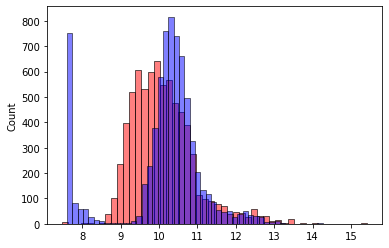

In [71]:
# let's now take a look at these predictions:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)

we can see even visually that our model is not ideal, however we need to have a Numeric measure that would allow us to compare different models between each other

# RMSE (root mean square error)

In [72]:
def rmse(y, y_pred):
    error = y - y_pred
    squared_error = error ** 2
    MSE = squared_error.mean() # mean squared error
    RMSE = np.sqrt(MSE) # square root
    return RMSE

In [73]:
rmse(y_train, y_pred)

0.7554192603920132

# Validating the Model

now we will make predictions for Validation dataset and then measure the RMSE for predictions

In [74]:
base = [
    'engine_hp',
    'engine_cylinders',
    'highway_mpg',
    'city_mpg',
    'popularity'
]

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [75]:
def prepare_X(df):
    # take only numbers dataset:
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

In [76]:
# prepare Matrix of training data:
X_train = prepare_X(df_train)
# fit the model:
w0, w = train_linear_regression(X_train, y_train)

#prepare validation dataset
X_val = prepare_X(df_val)
# make predictions on validation data
y_pred = w0 + X_val.dot(w)

#calculate RMSE on validation data
rmse(y_val, y_pred)


0.761653099130156

# Simple Feature Engineering

to improve our model, we can try to add new features

In [77]:
df_train.head((2))

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031


we can see that 3rd column is Year, which we understand is very important feature,  
but instead of using Year, we can compute age of the Car:

In [78]:
# calculating age of car:
#df_train['age'] = df_train['year'].max() - df_train['year']
#df_train.head(2)

this operation changes the original dataframe, which we do not want, therefore to eliminate this, we can use .copy() function:

In [79]:
# insert this calculation into data preparation function:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year'] # we use 2017 since in this year dataset was created

    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [80]:
X_train = prepare_X(df_train)
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [81]:
# we modified our dataset, therefore now our model will have more essential data and should be better:
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058299

True, RMSE is lower, therefore model quality is Higher, it is big improvement

let's try to see it in chart

<AxesSubplot:ylabel='Count'>

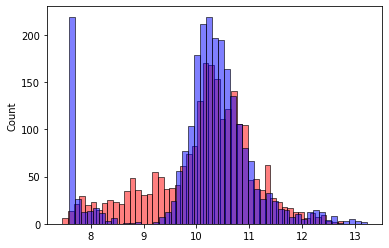

In [82]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

shape of model predictions is better suits

# Categorical Variables

typically they are strings, but may be coded into numbers  
also, **number of doors** is also Categorical, although it is Int DataType

what we do with such features - is Splitting into Several separated Binary Features (number of doors example):  
  


  
![](./pic/3.png)

In [83]:
# create column is number of doors = 2:
#df_train['num_doors_2'] = (df_train['number_of_doors'] == 2).astype('int')
#df_train['num_doors_3'] = (df_train['number_of_doors'] == 3).astype('int')
#df_train['num_doors_4'] = (df_train['number_of_doors'] == 4).astype('int')

#for v in [2, 3, 4]:
#    print('num_doors_%s' %v)
#    df_train['num_doors_%s' %v] = (df_train['number_of_doors'] == v).astype('int')

to add Number of doors feature we will modify Prepare Matrix function:

In [84]:
def prepare_X(df):
    df = df.copy()
    features = base.copy() # we do not want to modify base list

    df['age'] = 2017 - df['year'] # we use 2017 since in this year dataset was created
    features.append('age')

    # add number of doors:
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')
        # append brand new created features into features list to then have them in Matrix:
        features.append('num_doors_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [85]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641501685

Model improved but very little,  
therefore number of doors is not so useful

Now let's look at Brand (Make column)

In [86]:
# make column
makes = list(df.make.value_counts().head().index)

In [87]:
# add make column into Prepare function:
def prepare_X(df):
    df = df.copy()
    features = base.copy() # we do not want to modify base list

    df['age'] = 2017 - df['year'] # we use 2017 since in this year dataset was created
    features.append('age')

    # add number of doors:
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')
        # append brand new created features into features list to then have them in Matrix:
        features.append('num_doors_%s' %v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [88]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849556795

Now, we can see that the result improved

In [89]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [90]:
# add other columns:
categorical_variables = [
    'make',
    'engine_fuel_type',
    'transmission_type',
    'driven_wheels',
    'market_category',
    'vehicle_size',
    'vehicle_style'
]

In [91]:
# for each of category let's create dict with 5 most common values:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [92]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [93]:
# put All categories into Model:
# add make column into Prepare function:
def prepare_X(df):
    df = df.copy()
    features = base.copy() # we do not want to modify base list

    df['age'] = 2017 - df['year'] # we use 2017 since in this year dataset was created
    features.append('age')

    # add number of doors:
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')
        # append brand new created features into features list to then have them in Matrix:
        features.append('num_doors_%s' %v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [94]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

54.00560721279024

now we have very bad model performance

In [95]:
# look at values
int(w0)

-12949772332441632

In [96]:
w

array([-4.56768743e-01,  1.75167848e+01, -4.74975185e-01, -4.10062534e+00,
       -3.61819753e-04, -3.21994823e+00,  1.72450865e+03,  1.70065658e+03,
        1.71031654e+03,  1.02956189e+01,  1.21537881e+01, -1.59489068e+01,
        2.58465518e+01,  6.26777011e+00, -3.84827400e+02, -3.57806530e+02,
       -3.75258146e+02, -4.23642603e+02, -3.10400168e+02,  1.87587037e+16,
        1.87587037e+16,  1.87587037e+16,  1.87587037e+16,  1.87587037e+16,
       -5.80893139e+15, -5.80893139e+15, -5.80893139e+15, -5.80893139e+15,
        7.50173421e+00,  1.19532965e+01,  1.79790348e+01,  5.51629438e+01,
       -1.71771153e+01,  6.19992701e+01,  6.90937446e+01,  6.69709604e+01,
       -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
       -1.64412078e-01])

very very big values

# Regularization

![](./pic/4.png)

the problem with equation arises in the XTX matrix (inverse of Gram Matrix), since sometime it does not exists  
this may happen when X has duplicate columns, for example:

In [97]:
X = [
    [4, 4, 4,],
    [3, 5, 5,],
    [5, 1, 1,],
    [5, 4, 4,],
    [7, 5, 5,],
    [4, 5, 5,]
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

column 2 and 3 are the same

In [98]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

in that Matrix one column is the Linear Combination of other, therefore Inverse will not exist

In [99]:
try:
    np.linalg.inv(XTX)
except:
    print('Singular Matrix Error')

Singular Matrix Error


This is not the case for our particular problem, since we have many different observations and some of them should have Noise in data

In [100]:
# for example data with a little noise:
X = [
    [4, 4, 4,],
    [3, 5, 5,],
    [5, 1, 1,],
    [5, 4, 4,],
    [7, 5, 5,],
    [4, 5, 5.00000002,]
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000002]])

In [101]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000008],
       [111.        , 108.        , 108.0000001 ],
       [111.00000008, 108.0000001 , 108.0000002 ]])

now these 2 and 3 columns are not exactly the same, therefore it is not exactly singular, therefore it is Invertable:

In [102]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.86395645e-02, -6.18460786e+04,  6.18460357e+04],
       [-6.18460226e+04,  7.03687443e+13, -7.03687442e+13],
       [ 6.18459828e+04, -7.03687442e+13,  7.03687440e+13]])

In [103]:
y = [1,2,3,1,2,3]

In [104]:
XTX_inv.dot(X.T).dot(y)

array([ 1.96097803e-01, -1.76437186e+06,  1.76437209e+06])

for unique feature we have normal value of Weight, but for duplicates super large numbers

In [105]:
# what we can do is we can add small number on the main diagonal

In [106]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.000000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [107]:
np.linalg.inv(XTX)

array([[-3.33333334e-01,  6.60066006e-01,  6.60066120e-03],
       [ 6.60066082e-03, -9.90099009e+06,  9.90099008e+06],
       [ 6.60066006e-01,  9.90098976e+06, -9.90099009e+06]])

In [108]:
# now add small number to diagonal:
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.000000001],
    [2, 1.0000001, 1.01]
]

XTX = np.array(XTX)

np.linalg.inv(XTX)

array([[ -0.33668907,   0.33501233,   0.33501565],
       [  0.33501565,  49.91566147, -50.08484437],
       [  0.33501233, -50.0848427 ,  49.91566147]])

we can see that the weights are much smaller, this works since, but adding some number into the main diagonal, we ensure that columns are not duplicate of each other

In [109]:
# now add small number to diagonal:
XTX = [
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]

XTX = np.array(XTX)

In [110]:
# add value by function:
np.eye(3) * 0.01

array([[0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.01]])

In [111]:
# multiply:
XTX = XTX + np.eye(3) * 0.01
XTX

array([[1.01, 2.  , 2.  ],
       [2.  , 1.01, 1.  ],
       [2.  , 1.  , 1.01]])

In [112]:
np.linalg.inv(XTX)

array([[ -0.33668906,   0.33501399,   0.33501399],
       [  0.33501399,  49.91540897, -50.08459103],
       [  0.33501399, -50.08459103,  49.91540897]])

Regularization is about control the weights of the model, to prevent overfitting

In [113]:
# now, to introduce regularization into our model, we need to change Training function:
def train_linear_regression_reg(X, y, r = 0.001): #r - value for regularisation
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    # add regularisation:
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [114]:
# check the results of regularization:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse_score_1 = rmse(y_val, y_pred)
rmse_score_1

0.4565219901250058

this result is not only better than the worst case of overfitted model, but it is also significantly better then the result we had before adding all categorical features

# Tuning the Model

Since we have added a Regularization factor to the Model, we can change it.  
Therefor, our model has now Parameters, whuich we can change, therefore we need to find the Best Parameter value, and for that we need to Tune The Model!

to find the Best Parameter value we will use validation dataset:

In [116]:
# finding the best r parameter:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    rmse_score = rmse(y_val, y_pred)
    print(f'r = {r}, w0 = {w0},  RMSE = {rmse_score}')

r = 0.0, w0 = -1.2949772332441632e+16,  RMSE = 54.00560721279024
r = 1e-05, w0 = 5.5258027031441745,  RMSE = 0.45651699640519755
r = 0.0001, w0 = 6.333532977402495,  RMSE = 0.4565170623815473
r = 0.001, w0 = 6.285461083441768,  RMSE = 0.45651750851906375
r = 0.1, w0 = 6.191208698753889,  RMSE = 0.45656927629810246
r = 1, w0 = 5.634896668696929,  RMSE = 0.4572204317990783
r = 10, w0 = 4.283980108955739,  RMSE = 0.4701456932099557


so we see that even very small value of regularization significantly improves the Model Performance  
and the difference between 0.0001 and 0.001 is very small, so we simply pick r = 0.001

In [117]:
# train the model:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse_score = rmse(y_val, y_pred)
rmse_score

0.45651750851906375

So we picked the best regularization parameter (so tuned the model), now we should check it's performance on the Test dataset:

# Using the model

So, we have our model and now we should Train it again to include Train and Validation datasets in fitting and then Test Model on the Test dataset:

- we can call this dataset "Full train"

In [121]:
# combine train and validation datasets into 1:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [123]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [127]:
# combine the y_train and y_val:
y_full_train = np.concatenate([y_train, y_val])

In [128]:
# train the model:
r = 0.001

X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse_score = rmse(y_test, y_pred)
rmse_score

0.4517749307136715

RMSE is very similar to the value that we had on the validation dataset, which is a very good sign, it means that Model can generalize, and did not produce good score just by chance

Now we want to use it

In [129]:
# for example let's take a car from test dataset:
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

in real life we usually do not have DF with the data we want to put into our model  
Usually, we have some WebPage, from where we need to parse the required data:

![](./pic/5.png)

In [132]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [134]:
# to put this data into our model, we can convert it into small (1 row) DF:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [136]:
# and then we can use it the same as we did for testing dataset:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [139]:
# get prediction:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.462651706622708

In [141]:
# however this is Log1p of the Price, so we need to convert it back:
print(f'prediction price = {np.expm1(y_pred)}')

prediction price = 34983.19638428303


In [146]:
# real price:
real_price = np.expm1(y_test[20])
print(f'real_price = {real_price}')

real_price = 35000.00000000001


# Other questions we may answer:

- in this project we included only top 5 features (categorical). What will be with the Model Performance if we include 10 for example?:

In [152]:
# for each of category let's create dict with 10 most common values:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head(10).index)

In [156]:
# put All categories (10 top categories) into Model:
def prepare_X(df):
    df = df.copy()
    features = base.copy() # we do not want to modify base list

    df['age'] = 2017 - df['year'] # we use 2017 since in this year dataset was created
    features.append('age')

    # add number of doors:
    for v in [2, 3, 4]:
        df['num_doors_%s' %v] = (df['number_of_doors'] == v).astype('int')
        # append brand new created features into features list to then have them in Matrix:
        features.append('num_doors_%s' %v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [157]:
# train the model:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse_score = rmse(y_val, y_pred)
rmse_score

0.4422499428127777

after adding 10 top categories as features we can see better performance of the model, therefore we can see that there are still a potential in model improvement by Feature Engineering